In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.value_counts()

Car_Name          Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  Owner
fortuner          2015  23.00          30.61          40000       Diesel     Dealer        Automatic     0        2
ertiga            2016  7.75           10.79          43000       Diesel     Dealer        Manual        0        2
etios g           2014  4.75           6.76           40000       Petrol     Dealer        Manual        0        1
                        4.10           6.80           39485       Petrol     Dealer        Manual        1        1
etios cross       2015  4.50           7.70           40588       Petrol     Dealer        Manual        0        1
                                                                                                                 ..
Yamaha FZ S       2012  0.40           0.83           5500        Petrol     Individual    Manual        0        1
Yamaha FZ 16      2015  0.75           0.82           18000       Petrol     

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(2)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.value_counts()

Car_Name       Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  Owner
800            2003  0.35           2.28           127000      Petrol     Individual    Manual        0        1
Activa 3g      2008  0.17           0.52           500000      Petrol     Individual    Automatic     0        1
               2016  0.45           0.54           500         Petrol     Individual    Automatic     0        1
Activa 4g      2017  0.40           0.51           1300        Petrol     Individual    Automatic     0        1
Bajaj  ct 100  2015  0.18           0.32           35000       Petrol     Individual    Manual        0        1
                                                                                                              ..
wagon r        2013  2.90           4.41           56879       Petrol     Dealer        Manual        0        1
               2015  3.25           5.09           35500       CNG        Dealer        Manual       

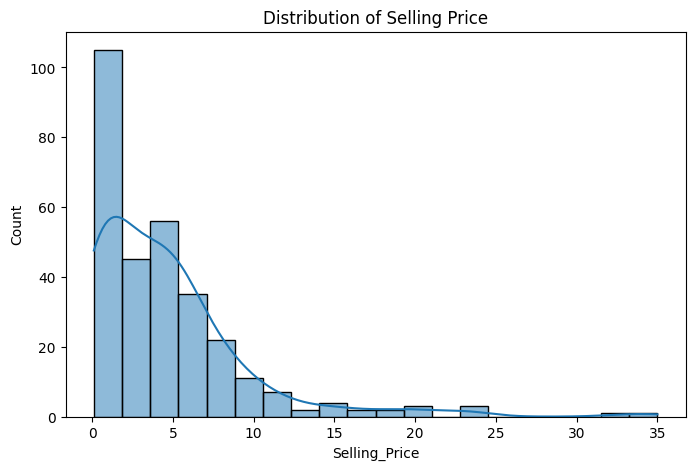

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Selling Price')
plt.show()


In [20]:
df['Car_Name'].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
brio                  10
fortuner              10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [21]:
df['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

In [22]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [23]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Object columns to convert:", categorical_cols)
# Output should be something like: ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']


Object columns to convert: Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')


In [24]:
# Apply one-hot encoding to all object columns in the DataFrame
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Note: drop_first=True removes the first category column for each feature.
# This helps prevent multicollinearity issues in models like Linear Regression.


In [25]:
print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)
print(df_encoded.head())
print("\nData Types after encoding:")
print(df_encoded.info())


Original shape: (299, 9)
Encoded shape: (299, 106)
   Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Name_Activa 3g  \
0  2014           3.35           5.59       27000      0               False   
1  2013           4.75           9.54       43000      0               False   
2  2017           7.25           9.85        6900      0               False   
3  2011           2.85           4.15        5200      0               False   
4  2014           4.60           6.87       42450      0               False   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0               False                   False                       False   
1               False                   False                       False   
2               False                   False                       False   
3               False                   False                       False   
4               False                   False                       False   

   Ca

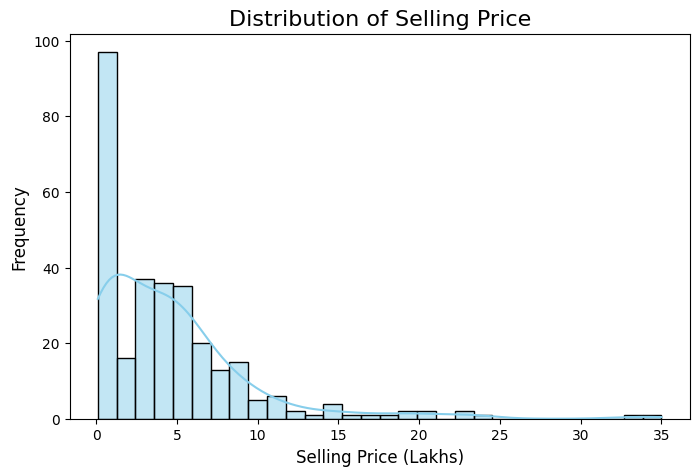

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price (Lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


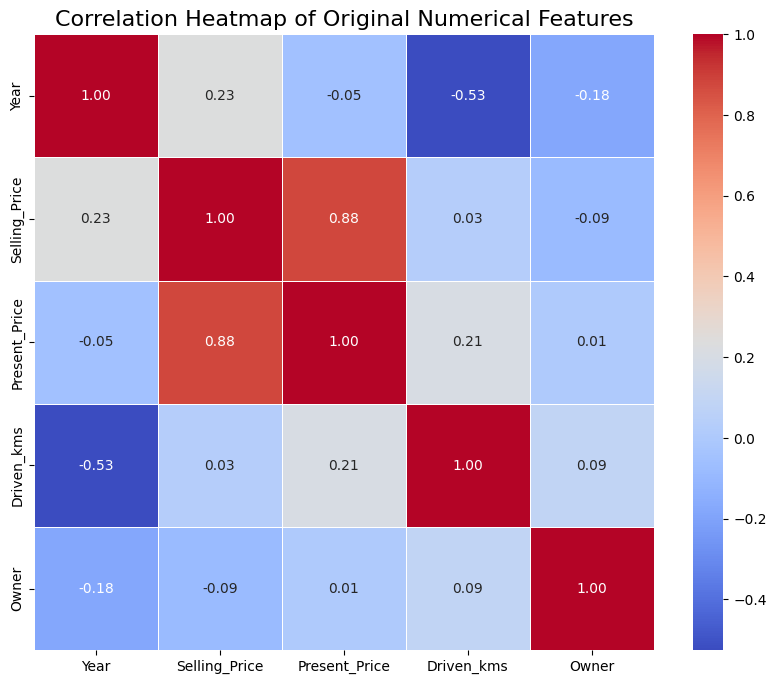

In [29]:
numerical_cols_original = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
numerical_df_original = df[numerical_cols_original]

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df_original.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Original Numerical Features', fontsize=16)
plt.show()


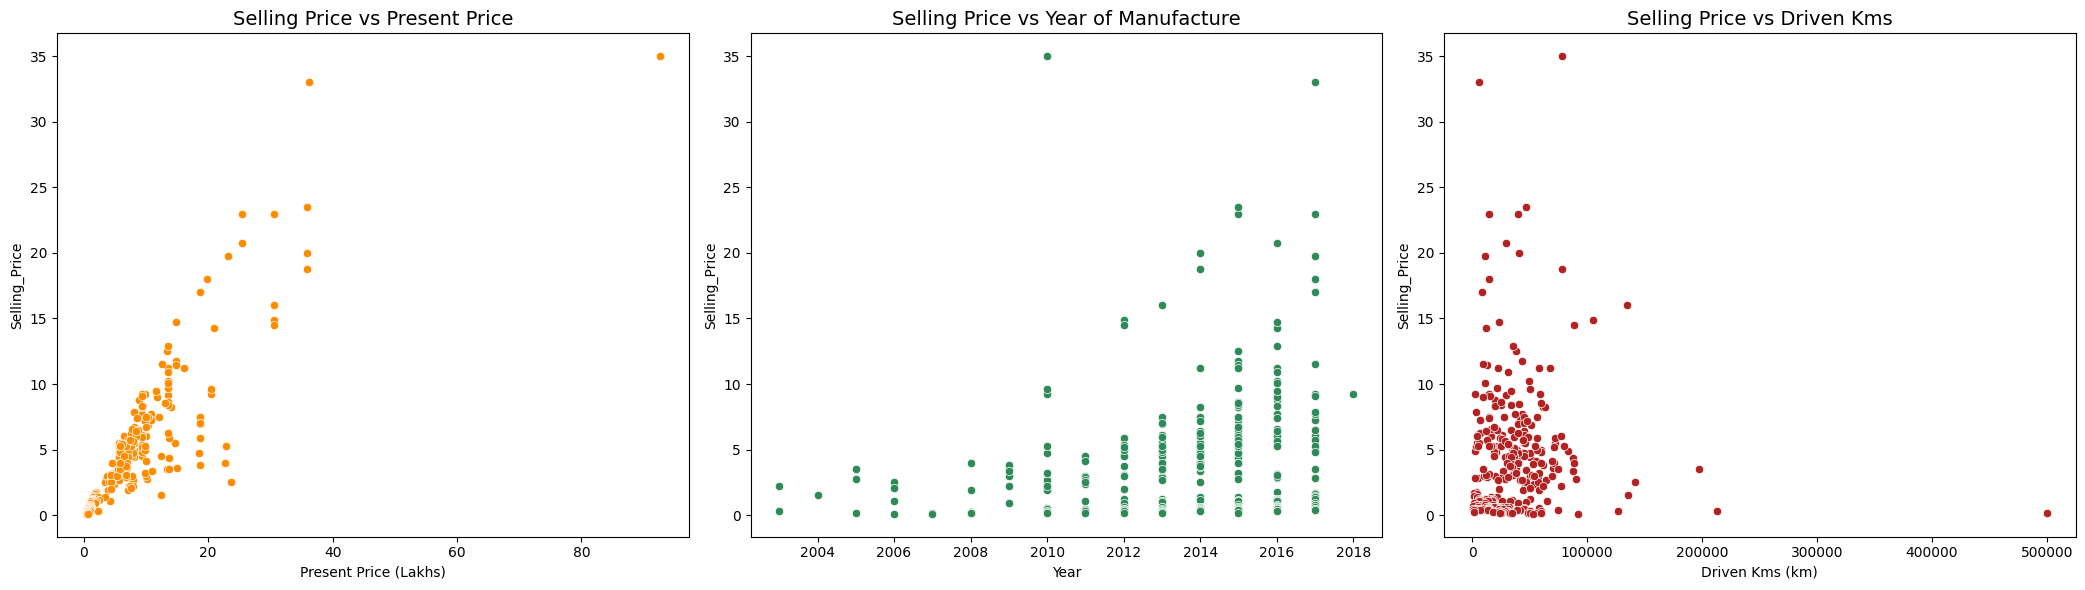

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Present Price vs Selling Price
sns.scatterplot(ax=axes[0], x='Present_Price', y='Selling_Price', data=df, color='darkorange')
axes[0].set_title('Selling Price vs Present Price', fontsize=14)
axes[0].set_xlabel('Present Price (Lakhs)')

# Year vs Selling Price
sns.scatterplot(ax=axes[1], x='Year', y='Selling_Price', data=df, color='seagreen')
axes[1].set_title('Selling Price vs Year of Manufacture', fontsize=14)
axes[1].set_xlabel('Year')

# Driven Kms vs Selling Price
sns.scatterplot(ax=axes[2], x='Driven_kms', y='Selling_Price', data=df, color='firebrick')
axes[2].set_title('Selling Price vs Driven Kms', fontsize=14)
axes[2].set_xlabel('Driven Kms (km)')

plt.tight_layout()
plt.show()


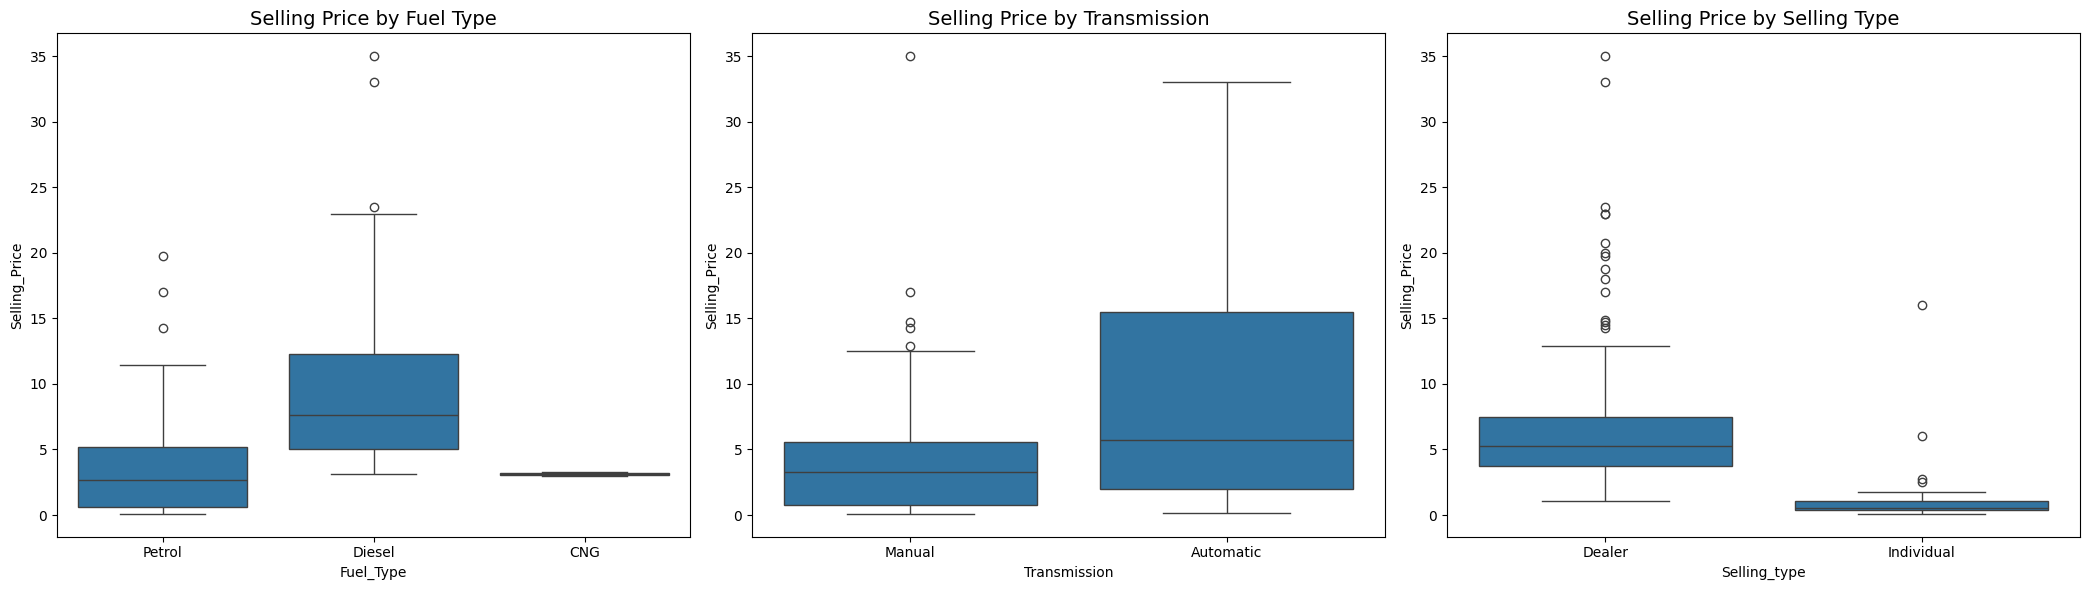

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

sns.boxplot(ax=axes[0], x='Fuel_Type', y='Selling_Price', data=df)
axes[0].set_title('Selling Price by Fuel Type', fontsize=14)

sns.boxplot(ax=axes[1], x='Transmission', y='Selling_Price', data=df)
axes[1].set_title('Selling Price by Transmission', fontsize=14)

sns.boxplot(ax=axes[2], x='Selling_type', y='Selling_Price', data=df)
axes[2].set_title('Selling Price by Selling Type', fontsize=14)

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import numpy as np

# Assume 'df' is your original DataFrame
# numerical_cols = ['Present_Price', 'Driven_kms', 'Selling_Price']

# Function to remove outliers for a given column
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds as 1.5 times the IQR from Q1 and Q3
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to keep only non-outliers
    # We use a boolean mask to keep rows where the value is within the bounds
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_cleaned

# Apply outlier removal to specific columns
# Note: It's best to apply this sequentially or ensure conditions are comprehensive.

# Remove outliers from 'Present_Price'
df_cleaned = remove_outliers_iqr(df, 'Present_Price')
print(f"Shape after removing 'Present_Price' outliers: {df_cleaned.shape}")

# Remove outliers from 'Driven_kms'
df_cleaned = remove_outliers_iqr(df_cleaned, 'Driven_kms')
print(f"Shape after removing 'Driven_kms' outliers: {df_cleaned.shape}")

# Remove outliers from 'Selling_Price' (the target variable might have genuine high values,
# but removing extreme high outliers can help linear models)
df_cleaned = remove_outliers_iqr(df_cleaned, 'Selling_Price')
print(f"Shape after removing 'Selling_Price' outliers: {df_cleaned.shape}")

# The new DataFrame without outliers is 'df_cleaned'
# You can now replace your original df with this cleaned version:
# df = df_cleaned.copy()


Shape after removing 'Present_Price' outliers: (285, 9)
Shape after removing 'Driven_kms' outliers: (280, 9)
Shape after removing 'Selling_Price' outliers: (276, 9)


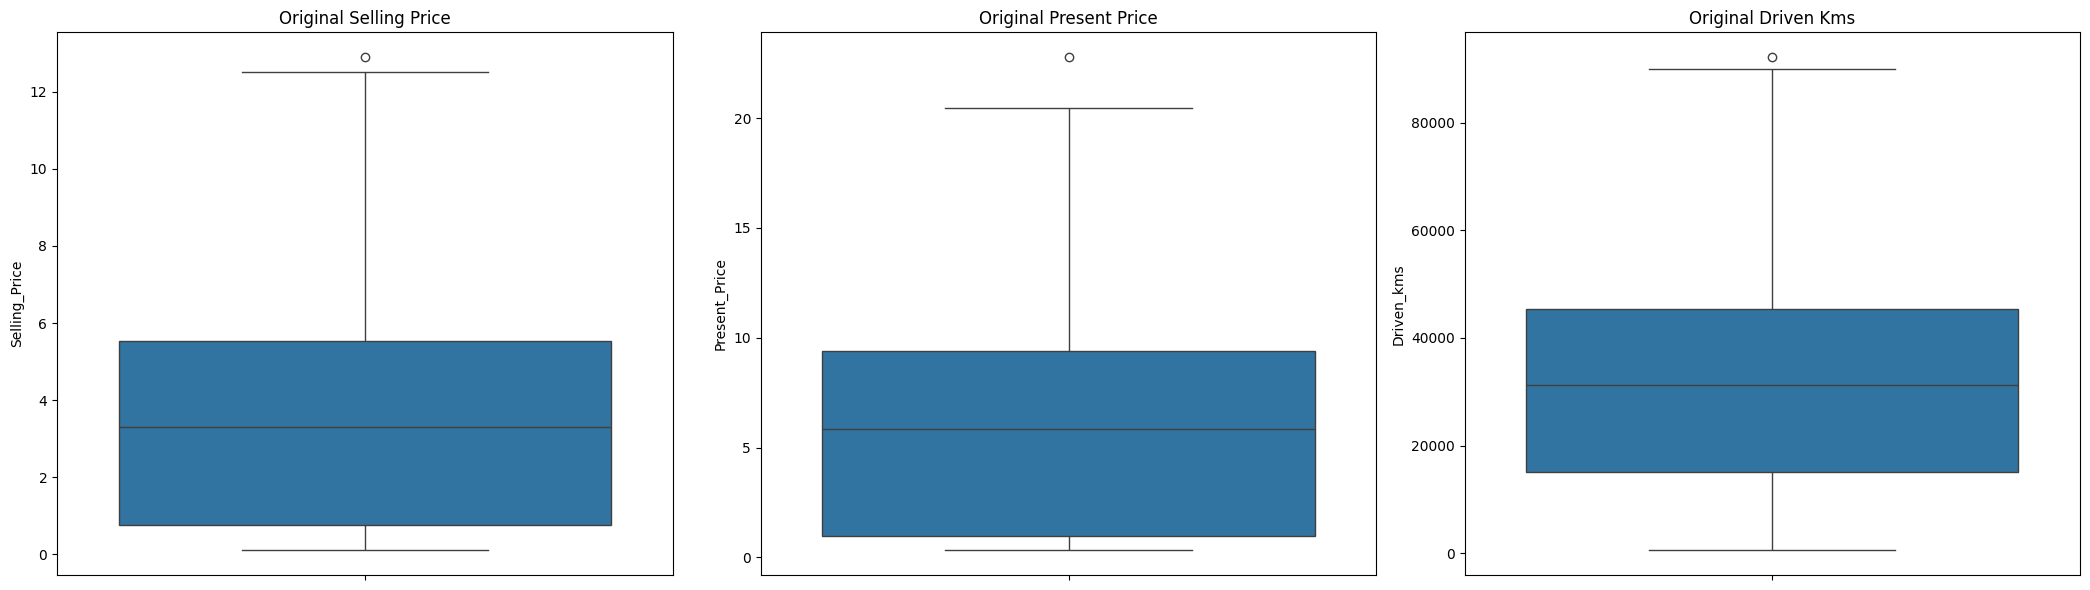

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

sns.boxplot(ax=axes[0], y='Selling_Price', data=df_cleaned)
axes[0].set_title('Original Selling Price')

sns.boxplot(ax=axes[1], y='Present_Price', data=df_cleaned)
axes[1].set_title('Original Present Price')

sns.boxplot(ax=axes[2], y='Driven_kms', data=df_cleaned)
axes[2].set_title('Original Driven Kms')

plt.tight_layout()
plt.show()


In [44]:
# Assuming you want to replace the original 'df' with the new 'df_cleaned' for continuity
df = df_cleaned.copy()

# Re-run the engineering steps on the cleaned data:
CURRENT_YEAR = 2025
df['Car_Age'] = CURRENT_YEAR - df['Year']
df['Brand'] = df['Car_Name'].apply(lambda x: x.split(' ')[0])# This line needs adjustment depending on your exact car names

# Drop the columns we decided were redundant
df = df.drop(['Year', 'Car_Name'], axis=1)


In [45]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split

# Assuming 'df' is your cleaned DataFrame and X, y are defined:
# X = df.drop('Selling_Price', axis=1)
# y = df['Selling_Price']

# --- Step 1: Split into a main training pool (80%) and a final test set (20%) ---
# We use a random_state for reproducibility of the split
X_train_pool, X_test, y_train_pool, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Split the training pool into actual training (75% of pool, 60% total)
# and development set (25% of pool, 20% total) ---
# We calculate test_size=0.25 (25% of the 80% pool)
X_train, X_dev, y_train, y_dev = train_test_split(
    X_train_pool, y_train_pool, test_size=0.25, random_state=42
)

# Verify the shapes of the resulting datasets
print(f"Total data points: {len(df)}")
print(f"Training set shape: {X_train.shape} (approx 60%)")
print(f"Development set shape: {X_dev.shape} (approx 20%)")
print(f"Test set shape: {X_test.shape} (approx 20%)")


Total data points: 276
Training set shape: (165, 8) (approx 60%)
Development set shape: (55, 8) (approx 20%)
Test set shape: (56, 8) (approx 20%)


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np # Ensure numpy is imported if needed for calculations

# Define numerical and categorical features based on your cleaned, engineered data
numerical_features = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age']
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']

# Create the preprocessor (same as before)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}




In [48]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Starting model comparison using Development Set:")

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Create the full pipeline for the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train the pipeline using the training data ONLY
    pipeline.fit(X_train, y_train)
    
    # Predict on the Development set
    dev_predictions = pipeline.predict(X_dev)
    
    # Calculate key metrics
    mae = mean_absolute_error(y_dev, dev_predictions)
    r2 = r2_score(y_dev, dev_predictions)
    
    # Store results
    results[name] = {"MAE": mae, "R2 Score": r2, "Pipeline": pipeline}
    
    print(f"{name} MAE (Dev Set): {mae:.2f} lakhs")
    print(f"{name} R2 Score (Dev Set): {r2:.4f}")



Starting model comparison using Development Set:

--- Training Linear Regression ---
Linear Regression MAE (Dev Set): 0.80 lakhs
Linear Regression R2 Score (Dev Set): 0.8842

--- Training Random Forest ---
Random Forest MAE (Dev Set): 0.68 lakhs
Random Forest R2 Score (Dev Set): 0.8930

--- Training XGBoost Regressor ---
XGBoost Regressor MAE (Dev Set): 0.70 lakhs
XGBoost Regressor R2 Score (Dev Set): 0.8453


In [52]:
# Ensure we have a pipeline to use for final evaluation.
# Prefer the Random Forest pipeline from `results` (if available), otherwise pick the best by R2,
# or fall back to `model_pipeline` if present.
selected_name = None

# If best_pipeline already exists and is not None, use it
if 'best_pipeline' in globals() and globals()['best_pipeline'] is not None:
	best_pipeline = globals()['best_pipeline']
	selected_name = globals().get('selected_name') or 'best_pipeline'
else:
	# Try to infer best_pipeline from results (prefer Random Forest)
	if 'results' in globals() and isinstance(results, dict):
		if 'Random Forest' in results:
			best_pipeline = results['Random Forest']['Pipeline']
			selected_name = 'Random Forest'
		elif len(results) > 0:
			# choose the model with highest R2 Score stored in results
			best_name = max(results.items(), key=lambda kv: kv[1].get('R2 Score', -float('inf')))[0]
			best_pipeline = results[best_name]['Pipeline']
			selected_name = best_name
			print(f"Selected best model from results: {selected_name}")
		else:
			best_pipeline = None
	elif 'model_pipeline' in globals() and globals()['model_pipeline'] is not None:
		# fallback to model_pipeline
		best_pipeline = globals()['model_pipeline']
		selected_name = 'model_pipeline'
		print("Using 'model_pipeline' as fallback best_pipeline.")
	else:
		raise NameError("best_pipeline is not defined and could not be inferred from 'results' or 'model_pipeline'.")

# Make final predictions on the held-out test set
test_predictions = best_pipeline.predict(X_test)

# Evaluate performance on the test set
# r2_score and mean_absolute_error are available from earlier imports
final_r2 = r2_score(y_test, test_predictions)
final_mae = mean_absolute_error(y_test, test_predictions)
# Compute RMSE using numpy to avoid re-importing sklearn.metrics
final_rmse = np.sqrt(((y_test - test_predictions) ** 2).mean())

model_label = selected_name if selected_name is not None else 'Selected Model'
print(f"\n--- FINAL Evaluation on Test Set for {model_label} ---")
print(f"Final R2 Score: {final_r2:.4f}")
print(f"Final MAE: {final_mae:.2f} lakhs")
print(f"Final RMSE: {final_rmse:.2f} lakhs")



--- FINAL Evaluation on Test Set for best_pipeline ---
Final R2 Score: 0.9402
Final MAE: 0.43 lakhs
Final RMSE: 0.79 lakhs


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the grid/distribution of parameters we want to test
# We use a dictionary where keys align with the 'regressor__*' naming convention for the pipeline
param_dist = {
    'regressor__n_estimators': randint(100, 1000),  # Number of trees in the forest
    'regressor__max_depth': randint(5, 20),         # Maximum depth of the trees
    'regressor__min_samples_split': randint(2, 10), # Min number of samples required to split a node
    'regressor__min_samples_leaf': randint(1, 5),   # Min number of samples required at a leaf node
    'regressor__bootstrap': [True, False]           # Method for sampling data points
}


In [54]:
# The model_pipeline is the same one defined previously (preprocessor + RandomForestRegressor)
# We need to recreate the pipeline variable here for use:

# Assume X_train and y_train are your training data (60% split)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_pipeline,      # The pipeline we want to tune
    param_distributions=param_dist, # The parameters to test
    n_iter=50,                      # Number of parameter settings that are sampled (try 50 combinations)
    cv=5,                           # Number of cross-validation folds
    scoring='neg_mean_absolute_error', # Metric to optimize (minimize MAE)
    verbose=1,                      # Output progress messages
    random_state=42,
    n_jobs=-1                       # Use all available CPU cores
)


In [55]:
# Fit the random search to the training data only
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/xeeshan/anaconda3/envs/langchain-env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/home/xeeshan/anaconda3/envs/langchain-env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/home/xeeshan/anaconda3/envs/langchain-env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'regressor__bootstrap': [True, False], 'regressor__max_depth': <scipy.stats....x7f39c1d62c10>, 'regressor__min_samples_leaf': <scipy.stats....x7f39cc6b2a10>, 'regressor__min_samples_split': <scipy.stats....x7f39cc628350>, ...}"
,n_iter,50
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [56]:
# Print the best parameters found
print(f"Best parameters found: {random_search.best_params_}")

# Get the best estimator (the tuned pipeline)
best_tuned_pipeline = random_search.best_estimator_


Best parameters found: {'regressor__bootstrap': True, 'regressor__max_depth': 18, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 476}


In [57]:
from sklearn.metrics import mean_absolute_error, r2_score

tuned_predictions = best_tuned_pipeline.predict(X_dev)
tuned_mae = mean_absolute_error(y_dev, tuned_predictions)
tuned_r2 = r2_score(y_dev, tuned_predictions)

print(f"\nEvaluation on Development Set (Tuned Model):")
print(f"MAE: {tuned_mae:.2f} lakhs")
print(f"R2 Score: {tuned_r2:.4f}")



Evaluation on Development Set (Tuned Model):
MAE: 0.68 lakhs
R2 Score: 0.8959


In [59]:
# Assuming X_test and y_test are your held-out test set (20% split)

# Use the best estimator found during the random search
best_tuned_pipeline = random_search.best_estimator_

# Make final predictions on the held-out test set
test_predictions_tuned = best_tuned_pipeline.predict(X_test)

# Evaluate performance on the test set
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

final_r2_tuned = r2_score(y_test, test_predictions_tuned)
final_mae_tuned = mean_absolute_error(y_test, test_predictions_tuned)
final_rmse_tuned = np.sqrt(mean_squared_error(y_test, test_predictions_tuned))

print(f"\n--- FINAL Evaluation on Test Set (Tuned Random Forest) ---")
print(f"Final Tuned R2 Score: {final_r2_tuned:.4f}")
print(f"Final Tuned MAE: {final_mae_tuned:.2f} lakhs")
print(f"Final Tuned RMSE: {final_rmse_tuned:.2f} lakhs")



--- FINAL Evaluation on Test Set (Tuned Random Forest) ---
Final Tuned R2 Score: 0.9386
Final Tuned MAE: 0.44 lakhs
Final Tuned RMSE: 0.80 lakhs


In [60]:
import joblib

# Assuming 'best_pipeline' holds your original untuned Random Forest Pipeline
joblib.dump(best_pipeline, 'car_price_predictor_final_model.joblib')
print("Final model saved.")


Final model saved.


In [ ]:
!pip install u